In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("play_tennis.csv")

In [4]:
df.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       14 non-null     object
 1   outlook   14 non-null     object
 2   temp      14 non-null     object
 3   humidity  14 non-null     object
 4   wind      14 non-null     object
 5   play      14 non-null     object
dtypes: object(6)
memory usage: 800.0+ bytes


In [6]:
df = df.drop("day", axis=1)

In [7]:
df.head()

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["outlook"] = le.fit_transform(df["outlook"])
df["temp"] = le.fit_transform(df["temp"])
df["humidity"] = le.fit_transform(df["humidity"])
df["wind"] = le.fit_transform(df["wind"])
df["play"] = le.fit_transform(df["play"])

In [9]:
df.head()

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [10]:
X_train = df.iloc[:10,:-1]
y_train = df.iloc[:10,-1]

X_test = df.iloc[10:,:-1]
y_test = df.iloc[10:,-1]

In [11]:
len(y_train)

10

In [12]:
len(y_test)

4

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [14]:
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()
mnb.fit(X_train, y_train)
y_predMNB = mnb.predict(X_test)

acc_mnbTrain = mnb.score(X_train, y_train) * 100
acc_mnbTest = accuracy_score(y_predMNB, y_test) * 100
print("Training Accuracy: ", acc_mnbTrain)
print("Validation Accuracy: ", acc_mnbTest)

Training Accuracy:  90.0
Validation Accuracy:  75.0


In [15]:
print(classification_report(y_test,y_predMNB))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



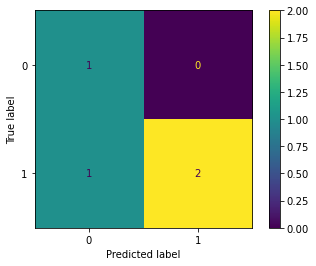

In [16]:
conf_matrix_MNB = plot_confusion_matrix(mnb, X_test, y_test)